In [1]:
import h5py
import numpy as np
import matplotlib
import sys
#matplotlib.use('Agg')
matplotlib.rcParams['mathtext.default'] = 'regular'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from PIL import Image
from numpy import inf
import numpy.ma as ma
from numpy import *

/Users/litadlc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Loading save number density files (n(v) at different j,k values)
n_v_SiII=np.load('n_v_SiII.npy')
n_v_SiIV=np.load('n_v_SiIV.npy')
n_v_OI=np.load('n_v_OI.npy')
n_v_OVI=np.load('n_v_OVI.npy')
n_v_CII=np.load('n_v_CII.npy')
n_v_CIV=np.load('n_v_CIV.npy')
n_v_SII=np.load('n_v_SII.npy')
n_v_NV=np.load('n_v_NV.npy')

In [3]:
#Constant that are needed to calculate Tau(v)
me=9.10e-28 #mass of electron in grams
c=3e18 #speed of light in Angstroms per sec
dv=1.2e6  #in cm length of velocity 
dr=4.94e20 #length of box in cm length along the x-axis
e = 4.80e-10 #in esu=((cm^3/2)*(grams^1/2))/s
#oscillator strength 
f_s_SiII=1.18
f_w_SiII=0.582
f_s_SiIV=0.524
f_w_SiIV=0.26
#f_s_OI=0.048
#f_w_OI=
f_s_OVI=0.1325
f_w_OVI=0.0658
f_s_CII=0.336
f_w_CII=0.168
f_s_CIV=0.190
f_w_CIV=0.0952
#f_s_SII=0.336
#f_w_SII=0.168
f_s_NV=0.156
f_w_NV=0.0777

#rest wave-length
rw_s_SiII=1260 # in Angstroms
rw_w_SiII=1193
rw_s_SiIV=1394 # in Angstroms
rw_w_SiIV=1403
#rw_s_OI=1302 #in Angstroms
#rw_w_OI=
rw_s_OVI=1032 #in Angstroms
rw_w_OVI=1038
rw_CII=904 #in Angstroms(similar value for both strong + week line)
rw_s_CIV=1548 #in Angstroms
rw_w_CIV=1551 #in Angstroms
rw_s_NV=1239 #in Angstroms
rw_w_NV=1243 #in Angstroms

In [4]:
dx = 2.411e17# size scale, in cm, 5/64 pc
T_jkw_SiII= ((((np.pi)*(e**2))/(me*c))*f_w_SiII*n_v_SiII*rw_w_SiII*(dx/dv))
test=T_jkw_SiII[:,:,4]
test1=np.reshape(test,512*512)
test2=T_jkw_SiII.mean(axis=(0,1))
#plt.plot(test2)
#plt.show()
np.max(test2)

0.026060590214653512

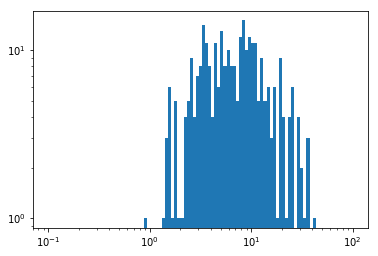

array([  0.1       ,   0.10722672,   0.1149757 ,   0.12328467,
         0.13219411,   0.14174742,   0.15199111,   0.16297508,
         0.17475284,   0.18738174,   0.2009233 ,   0.21544347,
         0.23101297,   0.24770764,   0.26560878,   0.28480359,
         0.30538555,   0.32745492,   0.35111917,   0.37649358,
         0.40370173,   0.43287613,   0.46415888,   0.49770236,
         0.53366992,   0.57223677,   0.61359073,   0.65793322,
         0.70548023,   0.75646333,   0.81113083,   0.869749  ,
         0.93260335,   1.        ,   1.07226722,   1.149757  ,
         1.23284674,   1.32194115,   1.41747416,   1.51991108,
         1.62975083,   1.7475284 ,   1.87381742,   2.009233  ,
         2.15443469,   2.3101297 ,   2.47707636,   2.65608778,
         2.84803587,   3.05385551,   3.27454916,   3.51119173,
         3.76493581,   4.03701726,   4.32876128,   4.64158883,
         4.97702356,   5.33669923,   5.72236766,   6.13590727,
         6.57933225,   7.05480231,   7.56463328,   8.11

In [5]:
#hist_values_Tau_s,b=np.histogram(test,bins=100)
#hist_values_Tau_w,b=np.histogram(Tau_jkw_SiII_50,bins=100,range=(0,1))
#plt.plot(hist_values_Tau_s,drawstyle='steps')
#plt.yscale("log")
#plt.xscale("log")
bins=np.logspace(-1,2,100)
plt.hist(test1,bins=bins,log=True)
plt.xscale("log")
plt.show()
bins

In [6]:
#np.sum(hist_values_Tau_s[1:99])/(np.sum(hist_values_Tau_s))

In [7]:
#log_1_Fw_SiII=np.log(c_SiII)+np.log(1-avgf_w_absorbed_SiII)
#log_1_Fw_OVI=np.log(c_OVI)+np.log(1-avgf_w_absorbed_OVI)

In [8]:
Tau_jks_SiII_dx= ((((np.pi)*(e**2))/(me*c))*f_s_SiII*n_v_SiII*rw_s_SiII*(dx/dv))
Tau_jkw_SiII_dx= ((((np.pi)*(e**2))/(me*c))*f_w_SiII*n_v_SiII*rw_w_SiII*(dx/dv))
Tau_jks_SiIV_dx= ((((np.pi)*(e**2))/(me*c))*f_s_SiIV*n_v_SiIV*rw_s_SiIV*(dx/dv))
Tau_jkw_SiIV_dx= ((((np.pi)*(e**2))/(me*c))*f_w_SiIV*n_v_SiIV*rw_w_SiIV*(dx/dv))
Tau_jks_OVI_dx= ((((np.pi)*(e**2))/(me*c))*f_s_OVI*n_v_OVI*rw_s_OVI*(dx/dv))
Tau_jkw_OVI_dx= ((((np.pi)*(e**2))/(me*c))*f_w_OVI*n_v_OVI*rw_w_OVI*(dx/dv))
Tau_jks_CII_dx= ((((np.pi)*(e**2))/(me*c))*f_s_CII*n_v_CII*rw_CII*(dx/dv))
Tau_jkw_CII_dx= ((((np.pi)*(e**2))/(me*c))*f_w_CII*n_v_CII*rw_CII*(dx/dv))
Tau_jks_CIV_dx= ((((np.pi)*(e**2))/(me*c))*f_s_CIV*n_v_CIV*rw_s_CIV*(dx/dv))
Tau_jkw_CIV_dx= ((((np.pi)*(e**2))/(me*c))*f_w_CIV*n_v_CIV*rw_w_CIV*(dx/dv))
Tau_jks_NV_dx= ((((np.pi)*(e**2))/(me*c))*f_s_NV*n_v_NV*rw_s_NV*(dx/dv))
Tau_jkw_NV_dx= ((((np.pi)*(e**2))/(me*c))*f_w_NV*n_v_NV*rw_w_NV*(dx/dv))

f_s_absorbed_SiII_dx=np.exp(-Tau_jks_SiII_dx)
f_w_absorbed_SiII_dx=np.exp(-Tau_jkw_SiII_dx)
f_s_absorbed_SiIV_dx=np.exp(-Tau_jks_SiIV_dx)
f_w_absorbed_SiIV_dx=np.exp(-Tau_jkw_SiIV_dx)
f_s_absorbed_OVI_dx=np.exp(-Tau_jks_OVI_dx)
f_w_absorbed_OVI_dx=np.exp(-Tau_jkw_OVI_dx)
f_s_absorbed_CII_dx=np.exp(-Tau_jks_CII_dx)
f_w_absorbed_CII_dx=np.exp(-Tau_jkw_CII_dx)
f_s_absorbed_CIV_dx=np.exp(-Tau_jks_CIV_dx)
f_w_absorbed_CIV_dx=np.exp(-Tau_jkw_CIV_dx)
f_s_absorbed_NV_dx=np.exp(-Tau_jks_NV_dx)
f_w_absorbed_NV_dx=np.exp(-Tau_jkw_NV_dx)

avgf_s_absorbed_SiII_dx=f_s_absorbed_SiII_dx.mean(axis=(0,1))
avgf_w_absorbed_SiII_dx=f_w_absorbed_SiII_dx.mean(axis=(0,1))
avgf_s_absorbed_SiIV_dx=f_s_absorbed_SiIV_dx.mean(axis=(0,1))
avgf_w_absorbed_SiIV_dx=f_w_absorbed_SiIV_dx.mean(axis=(0,1))
avgf_s_absorbed_OVI_dx=f_s_absorbed_OVI_dx.mean(axis=(0,1))
avgf_w_absorbed_OVI_dx=f_w_absorbed_OVI_dx.mean(axis=(0,1))
avgf_s_absorbed_CII_dx=f_s_absorbed_CII_dx.mean(axis=(0,1))
avgf_w_absorbed_CII_dx=f_w_absorbed_CII_dx.mean(axis=(0,1))
avgf_s_absorbed_CIV_dx=f_s_absorbed_CIV_dx.mean(axis=(0,1))
avgf_w_absorbed_CIV_dx=f_w_absorbed_CIV_dx.mean(axis=(0,1))
avgf_s_absorbed_NV_dx=f_s_absorbed_NV_dx.mean(axis=(0,1))
avgf_w_absorbed_NV_dx=f_w_absorbed_NV_dx.mean(axis=(0,1))

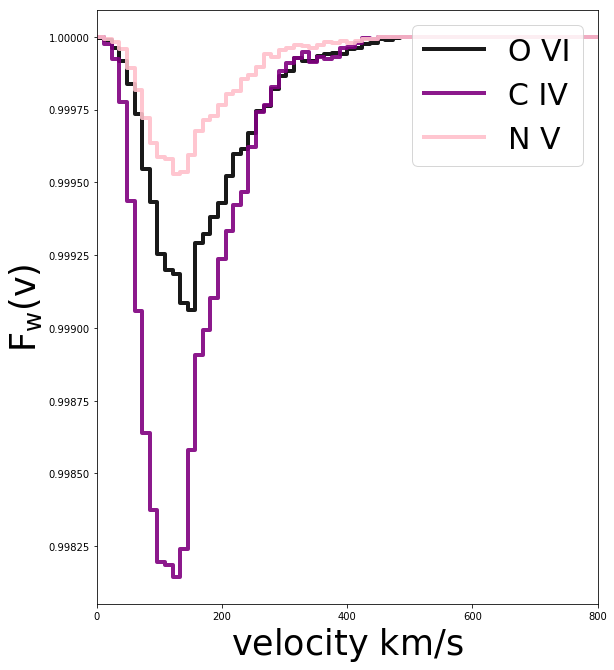

In [9]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
#plt.plot(velocity, avgf_w_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
#plt.plot(velocity, avgf_w_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
plt.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
#plt.plot(velocity, avgf_w_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
plt.plot(velocity, avgf_w_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
plt.plot(velocity, avgf_w_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$F_{w}(v)$',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

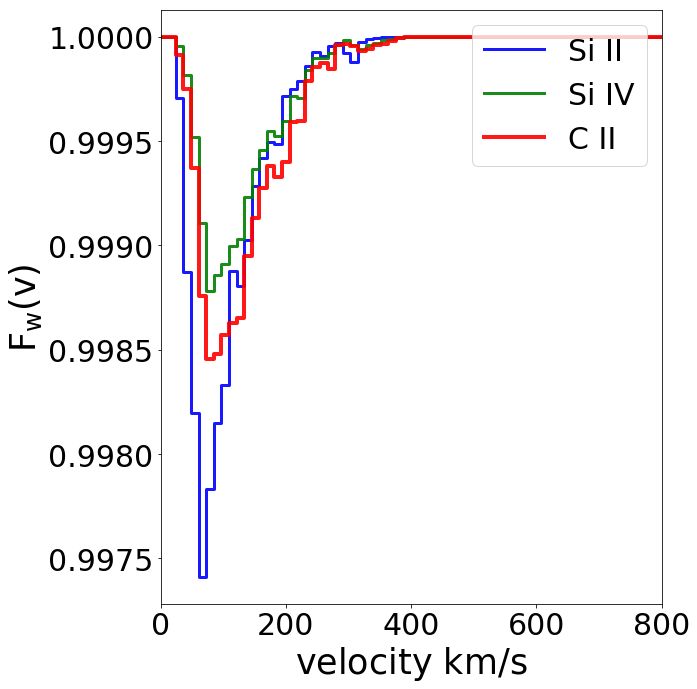

In [10]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, avgf_w_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
plt.plot(velocity, avgf_w_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
#plt.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
plt.plot(velocity, avgf_w_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
#plt.plot(velocity, avgf_w_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
#plt.plot(velocity, avgf_w_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$F_{w}(v)$',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

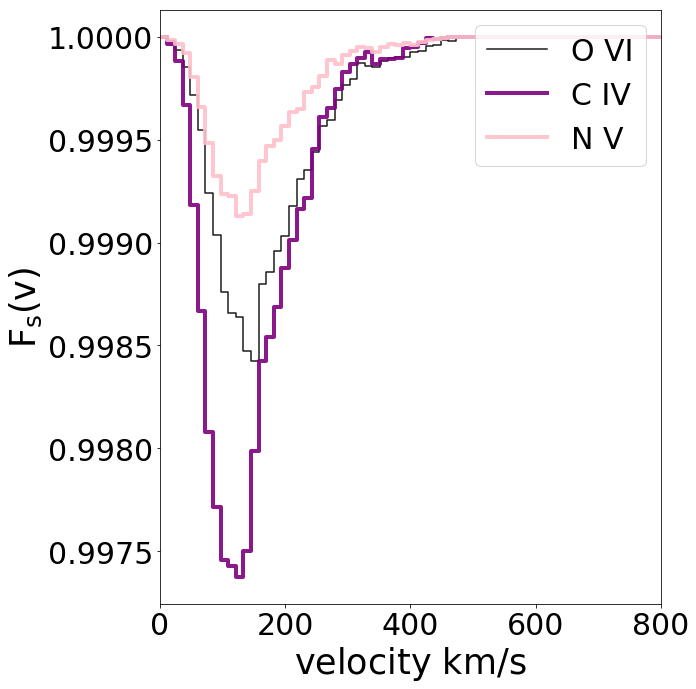

In [11]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
#plt.plot(velocity, avgf_s_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
#plt.plot(velocity, avgf_s_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
#plt.plot(velocity, avgf_s_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
plt.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90, color='black',label ='O VI')
plt.plot(velocity, avgf_s_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
plt.plot(velocity, avgf_s_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$F_{s}(v)$',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

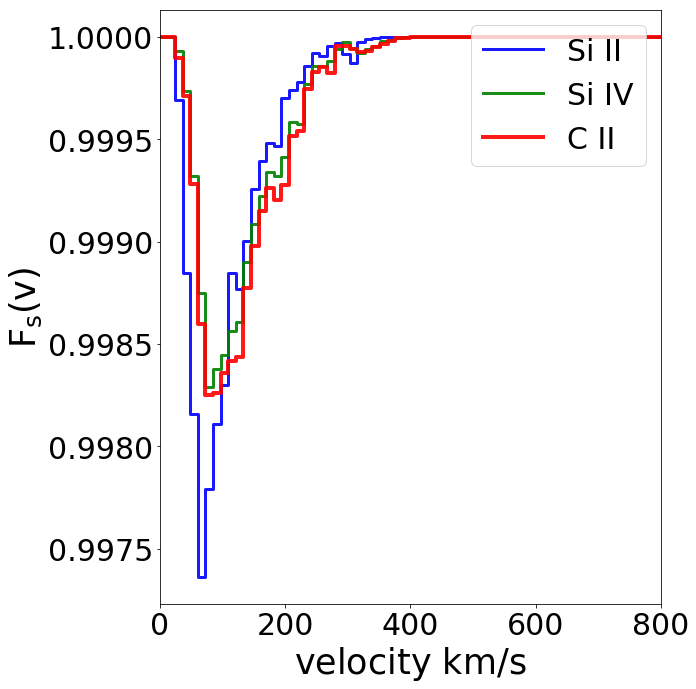

In [12]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, avgf_s_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
plt.plot(velocity, avgf_s_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
plt.plot(velocity, avgf_s_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
#plt.plot(velocity, avgf_s_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
#plt.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90, color='black',label ='O VI')
#plt.plot(velocity, avgf_s_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$F_{s}(v)$',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [13]:
c_SiII_dx=((avgf_w_absorbed_SiII_dx-1.)**2.)/(avgf_s_absorbed_SiII_dx-1.-(2.*(avgf_w_absorbed_SiII_dx-1.)))
c_SiIV_dx=((avgf_w_absorbed_SiIV_dx-1.)**2.)/(avgf_s_absorbed_SiIV_dx-1.-(2.*(avgf_w_absorbed_SiIV_dx-1.)))
c_OVI_dx=((avgf_w_absorbed_OVI_dx-1.)**2.)/(avgf_s_absorbed_OVI_dx-1.-(2.*(avgf_w_absorbed_OVI_dx-1.)))
c_CII_dx=((avgf_w_absorbed_CII_dx-1.)**2.)/(avgf_s_absorbed_CII_dx-1.-(2.*(avgf_w_absorbed_CII_dx-1.)))
c_CIV_dx=((avgf_w_absorbed_CIV_dx-1.)**2.)/(avgf_s_absorbed_CIV_dx-1.-(2.*(avgf_w_absorbed_CIV_dx-1.)))
c_NV_dx=((avgf_w_absorbed_NV_dx-1.)**2.)/(avgf_s_absorbed_NV_dx-1.-(2.*(avgf_w_absorbed_NV_dx-1.)))

/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: inva

In [14]:
where_are_NaNs1 = isnan(c_SiIV_dx)
where_are_NaNs2 = isnan(c_SiII_dx)
where_are_NaNs3 = isnan(c_OVI_dx)
where_are_NaNs4 = isnan(c_CII_dx)
where_are_NaNs5 = isnan(c_CIV_dx)
where_are_NaNs6 = isnan(c_NV_dx)
c_SiIV_dx[where_are_NaNs1] = 0
c_SiII_dx[where_are_NaNs2] = 0
c_OVI_dx[where_are_NaNs3] = 0
c_CII_dx[where_are_NaNs4] = 0
c_CIV_dx[where_are_NaNs5] = 0
c_NV_dx[where_are_NaNs6] = 0

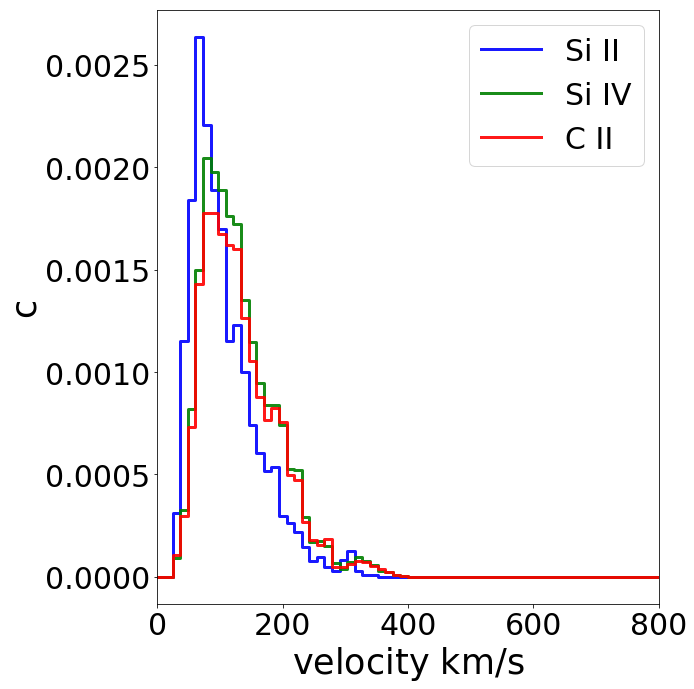

In [15]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, c_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
plt.plot(velocity, c_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
plt.plot(velocity, c_CII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C II')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'c',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

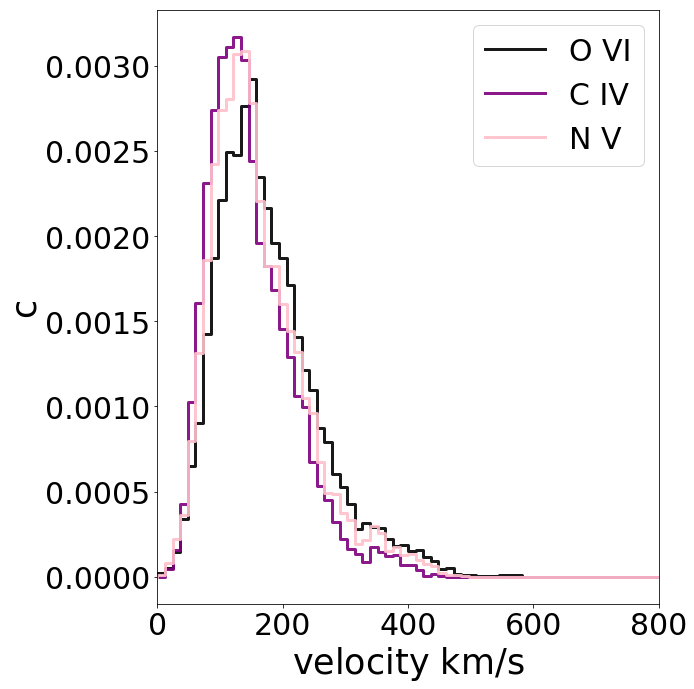

In [16]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
plt.plot(velocity, c_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='purple',label ='C IV')
plt.plot(velocity, c_NV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='pink',label ='N V')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'c',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [17]:
Tau_0_OVI_dx=np.log(1-avgf_w_absorbed_OVI_dx)-np.log(avgf_w_absorbed_OVI_dx-avgf_s_absorbed_OVI_dx)
Tau_0_SiII_dx=np.log(1-avgf_w_absorbed_SiII_dx)-np.log(avgf_w_absorbed_SiII_dx-avgf_s_absorbed_SiII_dx)
Tau_0_SiIV_dx=np.log(1-avgf_w_absorbed_SiIV_dx)-np.log(avgf_w_absorbed_SiIV_dx-avgf_s_absorbed_SiIV_dx)
Tau_0_CII_dx=np.log(1-avgf_w_absorbed_CII_dx)-np.log(avgf_w_absorbed_CII_dx-avgf_s_absorbed_CII_dx)
Tau_0_CIV_dx=np.log(1-avgf_w_absorbed_CIV_dx)-np.log(avgf_w_absorbed_CIV_dx-avgf_s_absorbed_CIV_dx)
Tau_0_NV_dx=np.log(1-avgf_w_absorbed_NV_dx)-np.log(avgf_w_absorbed_NV_dx-avgf_s_absorbed_NV_dx)

/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipyk

In [18]:
where_are_NaNs = isnan(Tau_0_OVI_dx)
where_are_NaNs1 = isnan(Tau_0_SiII_dx)
where_are_NaNs2 = isnan(Tau_0_SiIV_dx)
where_are_NaNs3 = isnan(Tau_0_CII_dx)
where_are_NaNs4 = isnan(Tau_0_CIV_dx)
where_are_NaNs5 = isnan(Tau_0_NV_dx)
Tau_0_OVI_dx[where_are_NaNs] = 0
Tau_0_SiII_dx[where_are_NaNs1] = 0
Tau_0_SiIV_dx[where_are_NaNs2] = 0
Tau_0_CII_dx[where_are_NaNs3] = 0
Tau_0_CIV_dx[where_are_NaNs4] = 0
Tau_0_NV_dx[where_are_NaNs5] = 0
Tau_0_OVI_dx[Tau_0_OVI_dx == inf] = 0
Tau_0_OVI_dx[Tau_0_OVI_dx < 0] = 0
Tau_0_SiIV_dx[Tau_0_SiIV_dx == inf] = 0
Tau_0_NV_dx[Tau_0_NV_dx == inf] = 0
Tau_0_SiIV_dx[Tau_0_SiIV_dx < 0] = 0
Tau_0_CII_dx[Tau_0_CII_dx < 0] = 0
Tau_0_CIV_dx[Tau_0_CIV_dx < 0] = 0
Tau_0_SiII_dx[Tau_0_SiII_dx < 0] = 0
Tau_0_NV_dx[Tau_0_NV_dx < 0] = 0

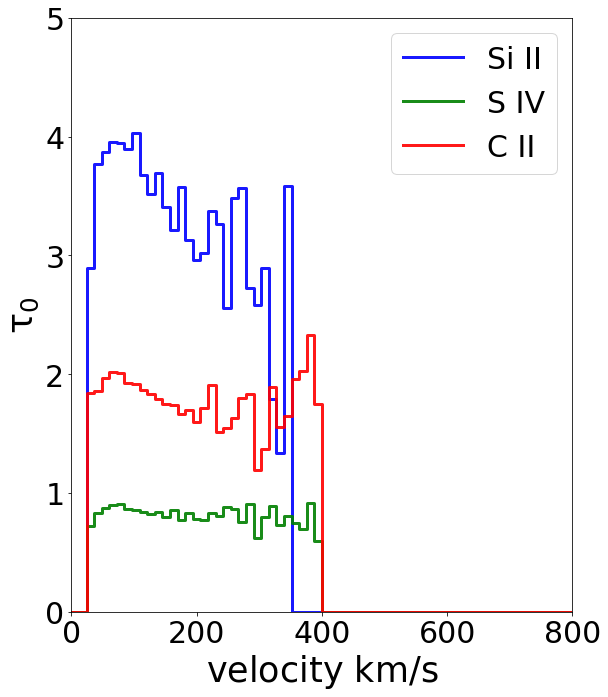

In [19]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, Tau_0_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
plt.plot(velocity, Tau_0_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='S IV')
plt.plot(velocity, Tau_0_CII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C II')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$\tau_{0}$',fontsize=35)
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
ax.set_ylim(0,5,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

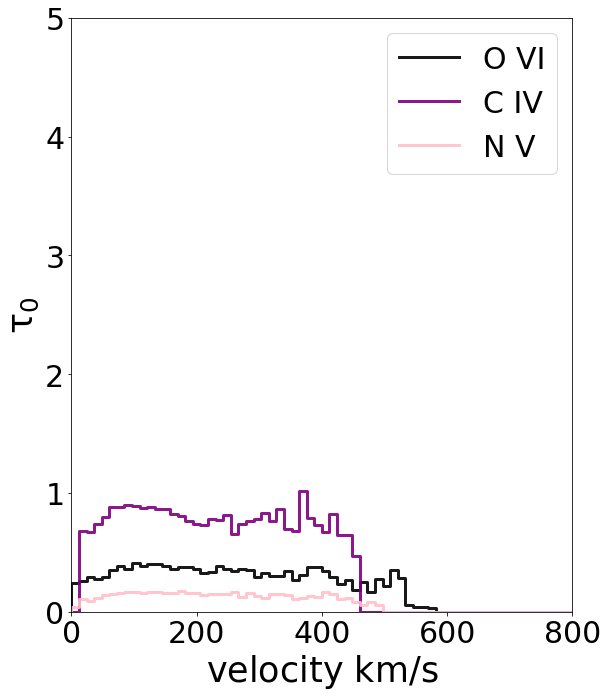

In [20]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, Tau_0_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
plt.plot(velocity, Tau_0_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='purple',label ='C IV')
plt.plot(velocity, Tau_0_NV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='pink',label ='N V')
plt.legend(loc='upper right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$\tau_{0}$',fontsize=35)
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,800,100)
ax.set_ylim(0,5,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [21]:
#x=-np.log(.10)
#Tau_0_OVI[Tau_0_OVI >= x] = x
#Tau_0_SiII[Tau_0_SiII >= x] = x

In [22]:
np.log10(10)

1.0